# Function approximation with linear models and neural network
* Are Linear models sufficient for approximating transcedental functions? What about polynomial functions?
* Do neural networks perform better in those cases?
* Does the depth of the neural network matter?

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline

## Global variables for the program

In [2]:
n_points = 75 #Number of points for constructting function
x_min = 1 # Min of the range of x (feature)
x_max = 15 # Max of the range of x (feature)
noise_mean = 0 #Mean of the Gaussian noise adder
noise_sd = 10 #stddev of the Gaussian noise adder

## Generate feature and output vector following a non-linear function
The ground truth or originating function is as follows:

$$ y=f(x)= (20x+3x^2+0.1x^3).sin(x).e^{-0.1x}+\psi(x) $$

$$ {OR} $$

$$ y=f(x)= (20x+3x^2+0.1x^3)+\psi(x) $$

$${where,}\ \psi(x) : {\displaystyle f(x\;|\;\mu ,\sigma ^{2})={\frac {1}{\sqrt {2\pi \sigma ^{2}}}}\;e^{-{\frac {(x-\mu )^{2}}{2\sigma ^{2}}}}} $$

In [3]:
#Definition of the function with expoential and sinusoidal tearms
def func_trans(x):
    result = (20*x + 3*x**2 + 0.1*x**3) * np.sin(x)*np.exp(-0.1*x)
    return result

In [4]:
#Definition of the function without exponential and sinusoidal terms, just the polynomial
def func_poly(x):
    result = 20*x + 3*x**2 + 0.1*x**3
    return result

In [5]:
#Densely spaced points for generating the ideal functional curve
x_smooth = np.array(np.linspace(start=x_min, stop=x_max, num=501))

#Use one of the following
y_smooth = func_trans(x_smooth)
#y_smooth = func_poly(x_smooth)

In [6]:
#Linearly spaced sample points
X = np.array(np.linspace(start=x_min, stop=x_max, num=n_points))

In [7]:
#Added observational/mesurement noise
noise_x = np.random.normal(loc=noise_mean, scale=noise_sd, size=n_points)

In [8]:
#Observed output after adding the noise
y = func_trans(X) + noise_x

In [9]:
#Store the values in dataframe
df = pd.DataFrame(data=X, columns=['X'])
df['Ideal y'] = df['X'].apply(func_trans)
df['y'] = y
df.head()

,X,Ideal y,y
0,1.000000,17.588211,27.430901
1,1.189189,23.232586,27.625289
2,1.378378,28.672889,14.010402
3,1.567568,33.434022,18.111997
4,1.756757,37.046351,49.748493


## Plot the function(s), both the ideal characteristic and the observed output (with process and observation noise)

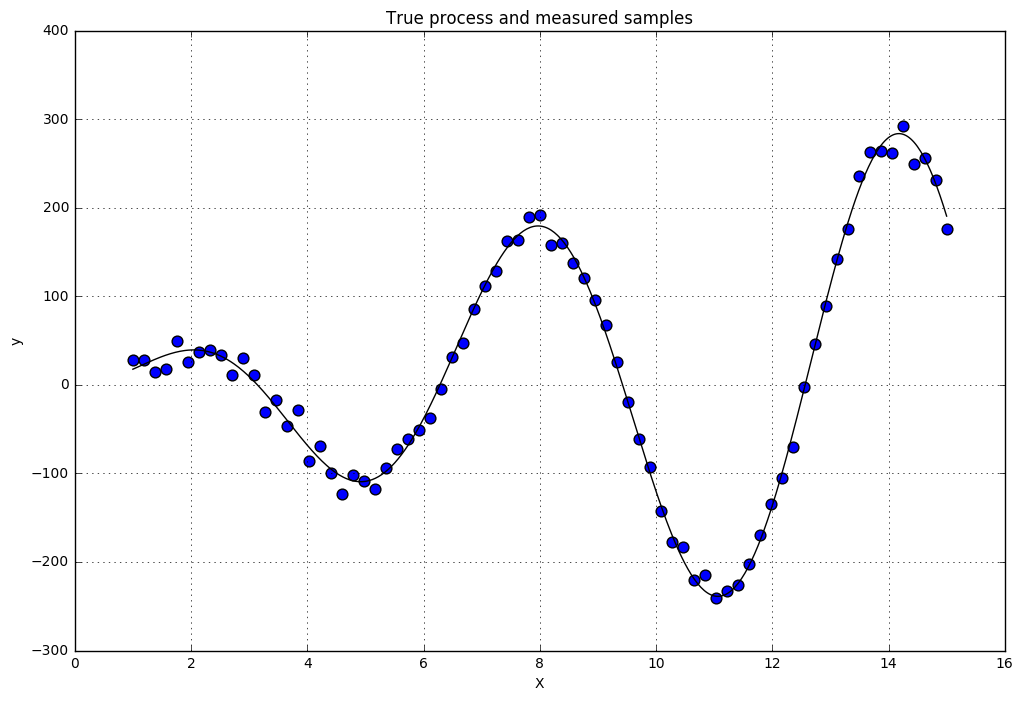

In [10]:
df.plot.scatter(x='X', y='y', title='True process and measured samples', grid=True, edgecolor=(0,0,0), c='blue', s=60, figsize=(12,8))
plt.plot(x_smooth, y_smooth, 'k')

## Import sklearn lib and prepare train/test split

In [11]:
from sklearn.linear_model import LinearRegression, LassoCV, RidgeCV
from sklearn.ensemble import AdaBoostRegressor
from sklearn.preprocessing import PolynomialFeatures
from sklearn.model_selection import train_test_split
from sklearn.pipeline import make_pipeline
from sklearn import preprocessing

In [12]:
X_train, X_test, y_train, y_test = train_test_split(df['X'], df['y'], test_size=0.33)
X_train

6      2.135135
70    14.243243
61    12.540541
66    13.486486
54    11.216216
73    14.810811
64    13.108108
17     4.216216
43     9.135135
44     9.324324
3      1.567568
48    10.081081
40     8.567568
62    12.729730
8      2.513514
27     6.108108
0      1.000000
45     9.513514
31     6.864865
72    14.621622
5      1.945946
9      2.702703
37     8.000000
55    11.405405
67    13.675676
23     5.351351
14     3.648649
7      2.324324
38     8.189189
34     7.432432
16     4.027027
49    10.270270
52    10.837838
26     5.918919
15     3.837838
13     3.459459
57    11.783784
2      1.378378
32     7.054054
10     2.891892
53    11.027027
74    15.000000
65    13.297297
41     8.756757
58    11.972973
1      1.189189
4      1.756757
42     8.945946
51    10.648649
29     6.486486
Name: X, dtype: float64

In [13]:
X_train = X_train.values.reshape(X_train.size, 1)
y_train = y_train.values.reshape(y_train.size, 1)
X_test = X_test.values.reshape(X_test.size, 1)
y_test = y_test.values.reshape(y_test.size, 1)

X_scaled = preprocessing.scale(X_train)
y_scaled = preprocessing.scale(y_train)

In [14]:
print(X_train.shape)

(50, 1)


## Polynomial model with LASSO/Ridge regularization (pipelined) with lineary spaced samples

**This is an advanced machine learning method which prevents over-fitting by penalizing high-valued coefficients i.e. keep them bounded**

### Regression model parameters

In [15]:
#Alpha (regularization strength) of ridge regression
ridge_alpha = tuple([10**x for x in range(-3,0,1)])
print(ridge_alpha)

#Regularization strength parameeters of Lasso regression
lasso_eps = 0.0001
lasso_alpha = 20
lasso_iter = 5000

#Min and max degree of polynomials features to consider
degree_min = 2
degree_max = 8

(0.001, 0.01, 0.1)


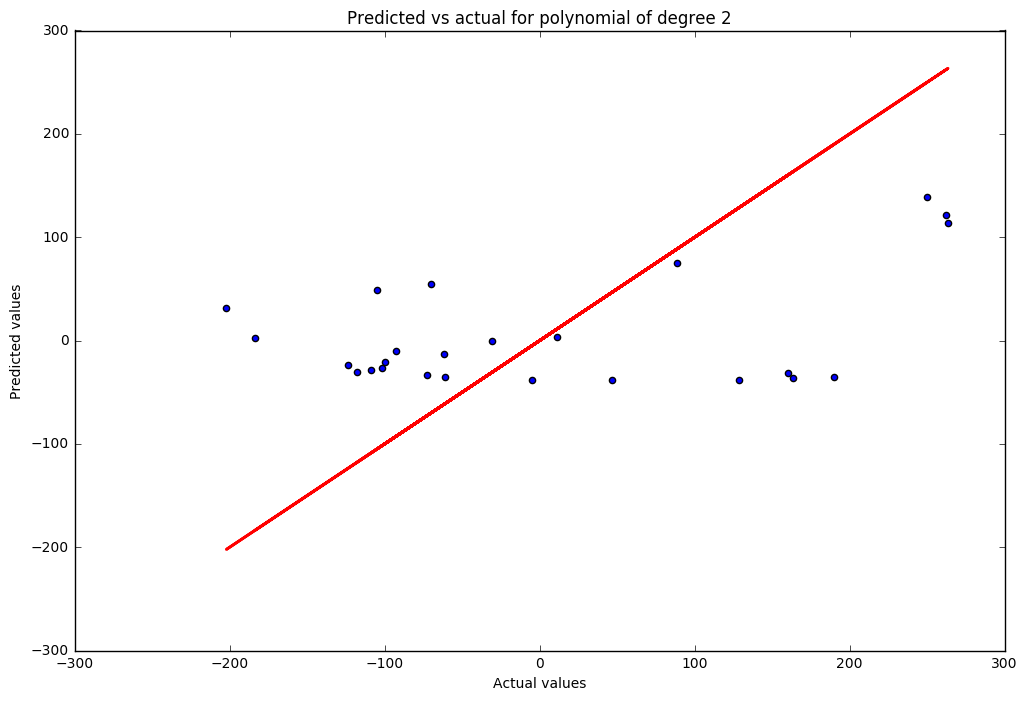

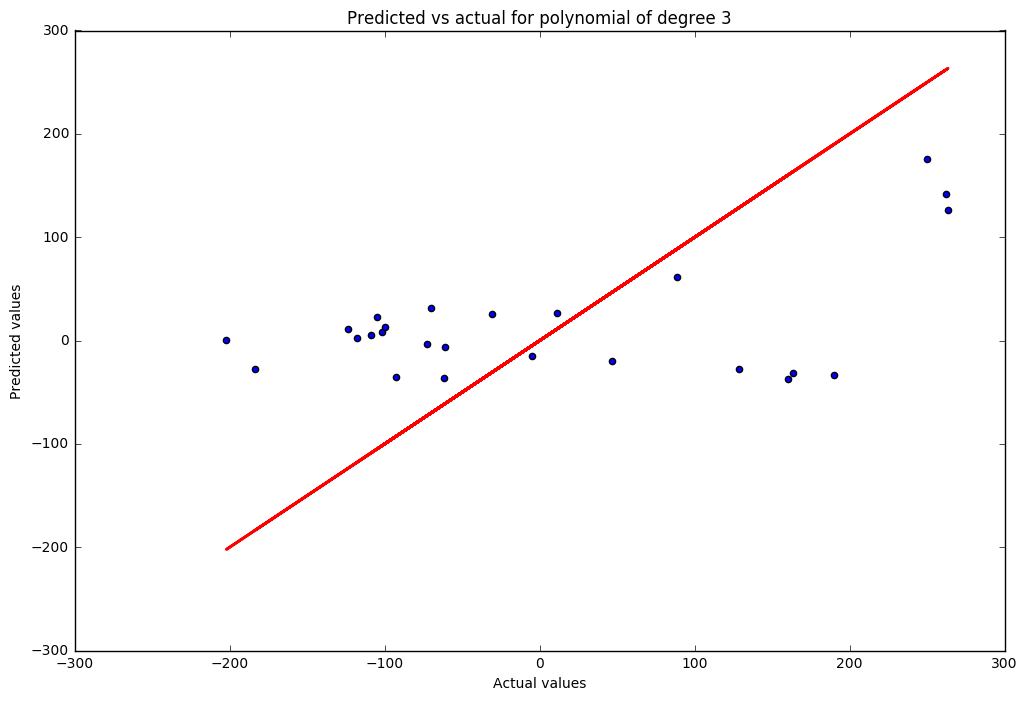

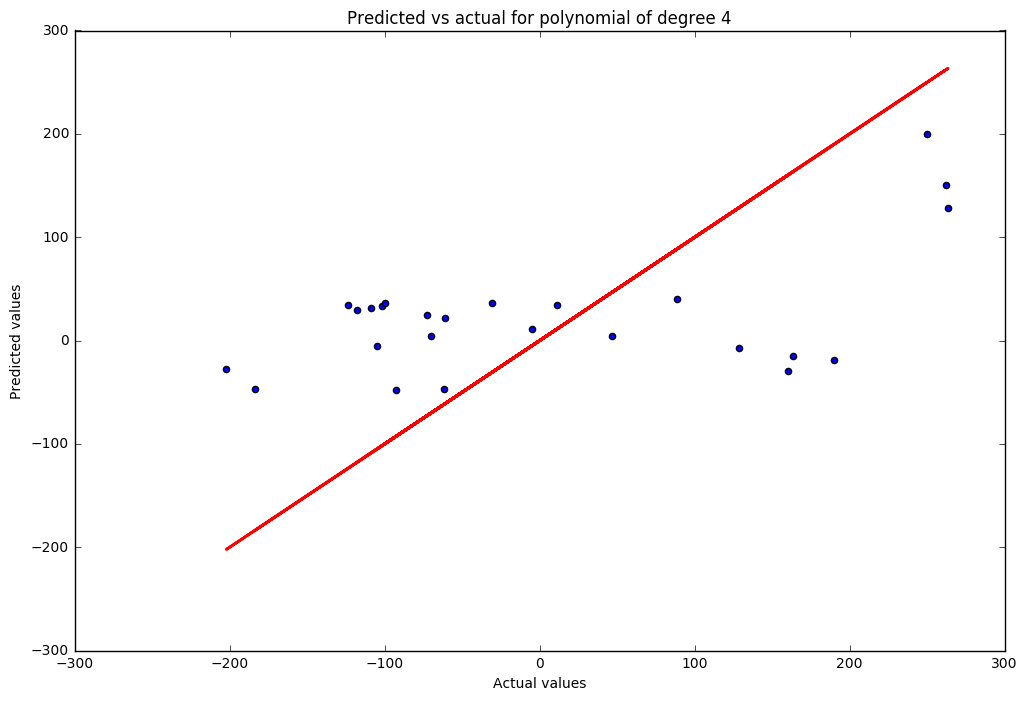

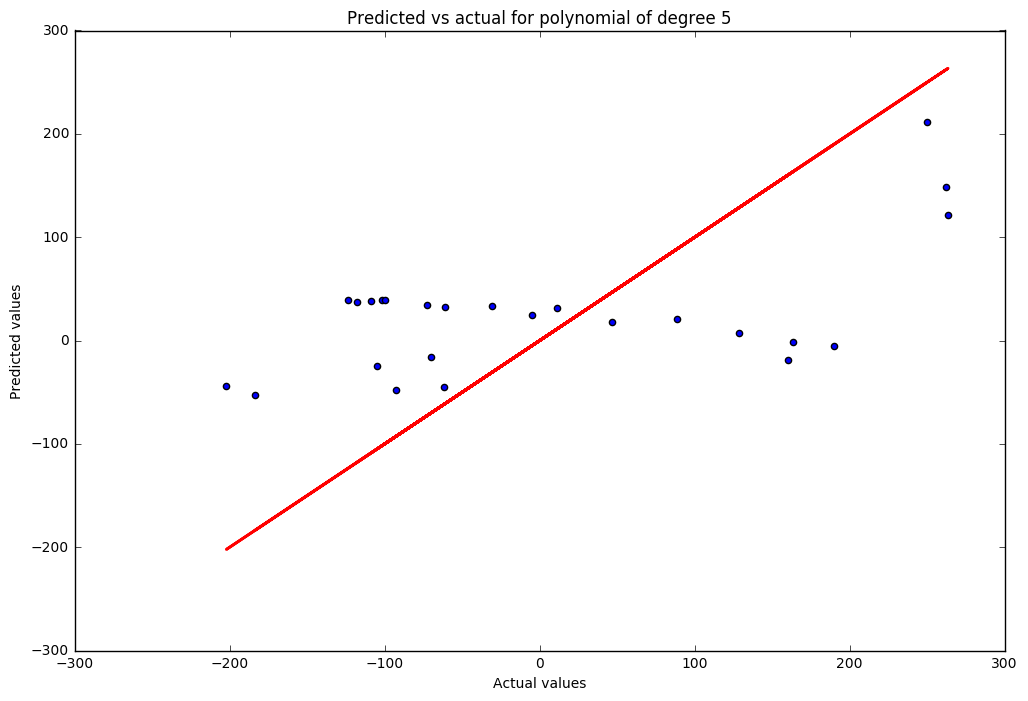

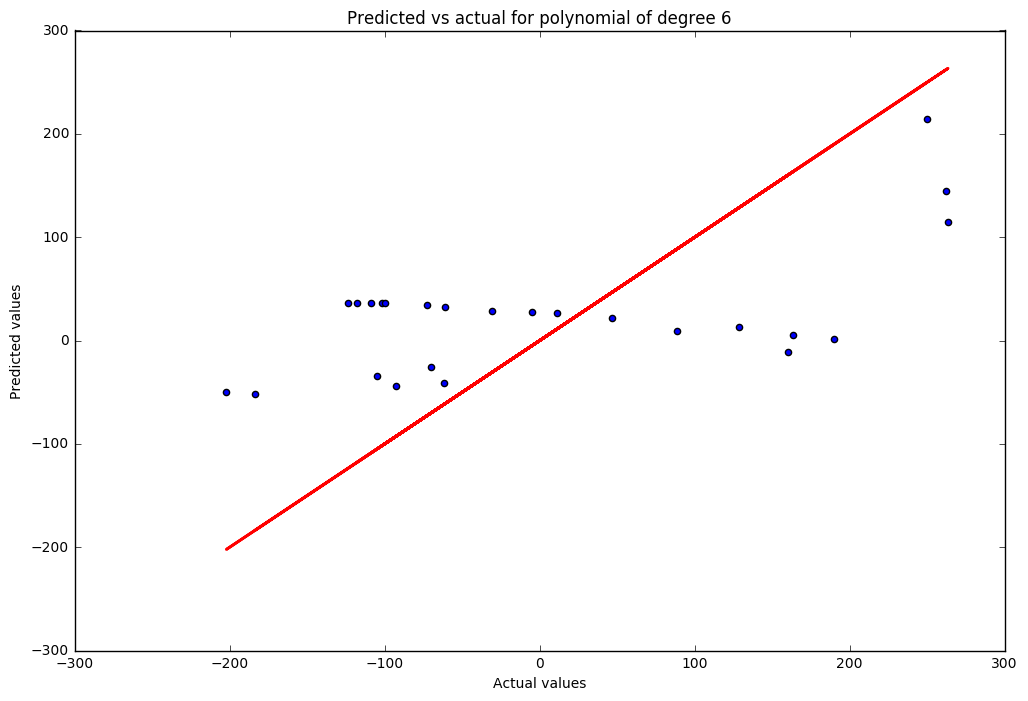

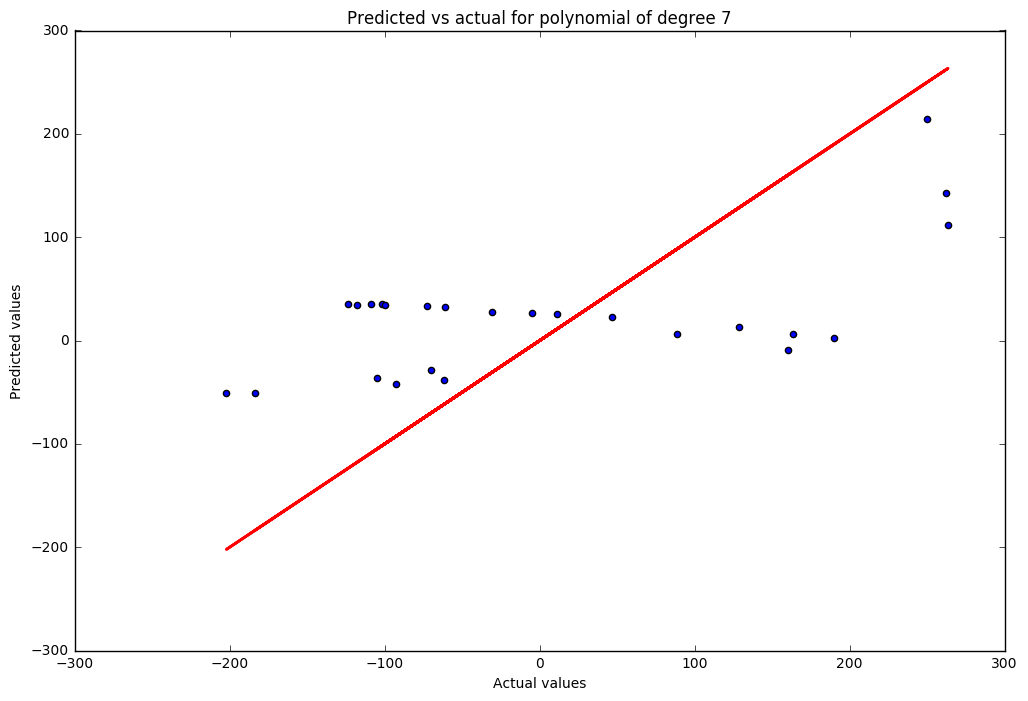

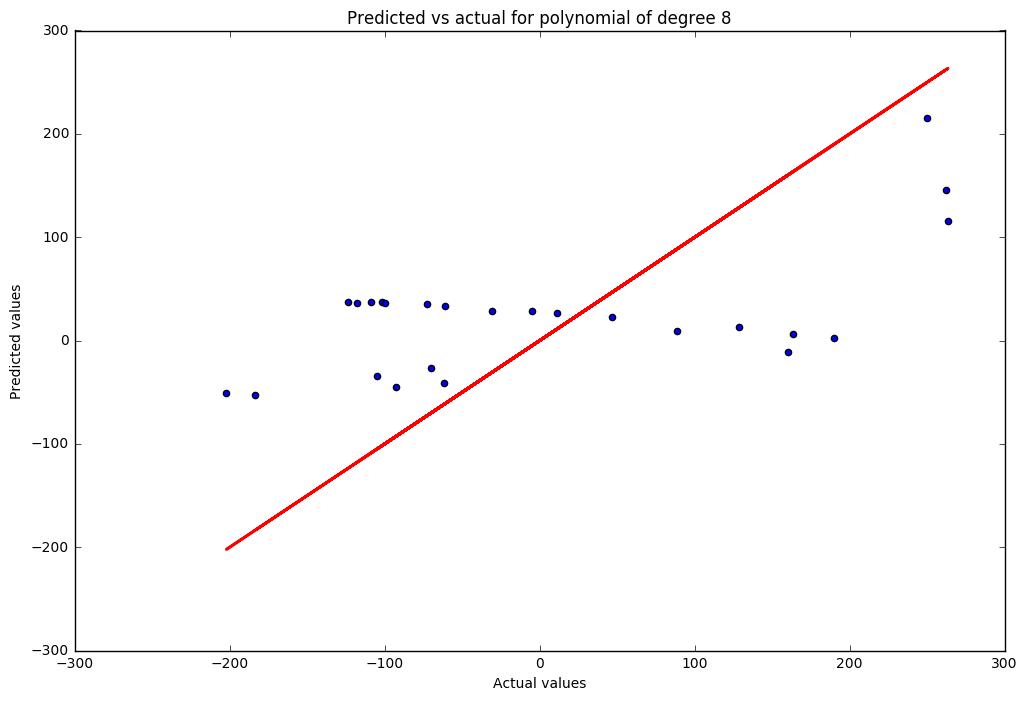

In [16]:
#Empty list to store model data
linear_sample_score = []
poly_degree = []
rmse = []
t_linear = []

import time
#Iterate over incresing degree of polynomial complexity
for degree in range(degree_min, degree_max+1):
    start = time.time()
    
    model = make_pipeline(PolynomialFeatures(degree), RidgeCV(alphas=ridge_alpha, normalize=True, cv=5))
    #model = make_pipeline(PolynomialFeatures(degree), LassoCV(eps=lasso_eps, n_alphas=lasso_alpha, max_iter=lasso_iter, normalize=True, cv=5))
    #model = make_pipeline(PolynomialFeatures(degree), LinearRegression(normalize=True))
    
    model.fit(X_train, y_train)
    
    end = time.time()
    t_linear.append(end - start)
    
    y_pred = np.array(model.predict(X_train))
    test_pred = np.array(model.predict(X_test))
    RMSE = np.sqrt(np.sum(np.square(test_pred-y_test)))
    test_score = model.score(X_test, y_test)
    
    linear_sample_score.append(test_score)
    rmse.append(RMSE)
    poly_degree.append(degree)
    
    
    plt.figure(figsize=(12,8))
    plt.title('Predicted vs actual for polynomial of degree {}'.format(degree))
    plt.xlabel('Actual values')
    plt.ylabel('Predicted values')
    plt.scatter(x=y_test, y=test_pred)
    plt.plot(y_test, y_test, 'r', lw=2)

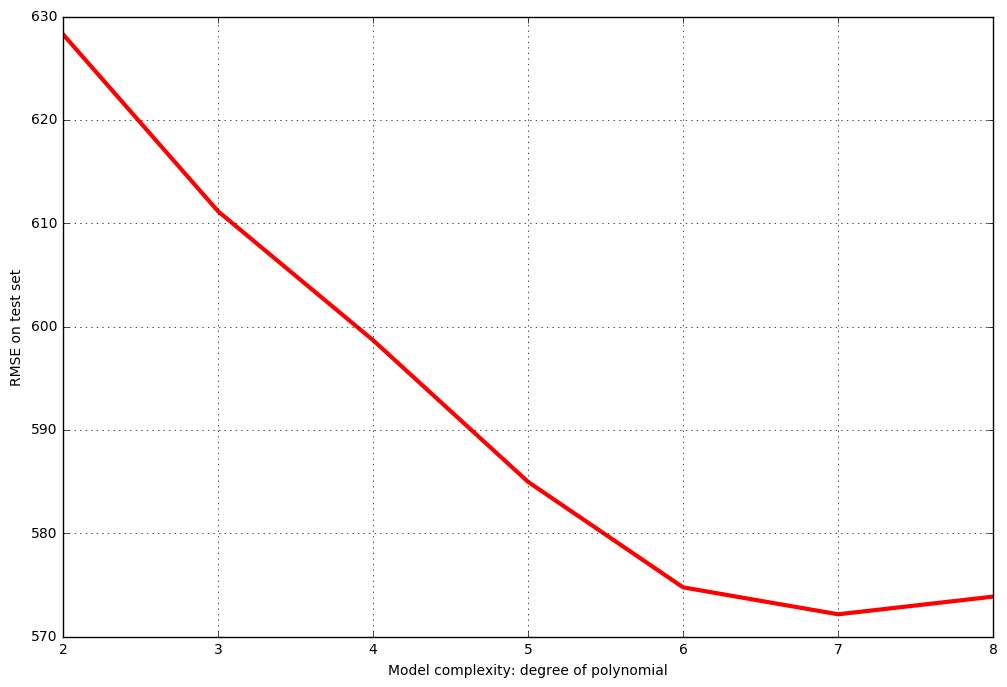

In [17]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(poly_degree, rmse, lw=3, c='red')
plt.xlabel('Model complexity: degree of polynomial')
plt.ylabel('RMSE on test set')

In [18]:
df_score = pd.DataFrame(data={'degree':[d for d in range(degree_min, degree_max+1)], 'Linear sample score': linear_sample_score})
df_score

,Linear sample score,degree
0,0.192561,2
1,0.235969,3
2,0.266843,4
3,0.300032,5
4,0.324246,6
5,0.330360,7
6,0.326355,8


In [19]:
t_linear = np.array(t_linear)
time_linear = np.sum(t_linear)
time_linear

0.18692469596862793

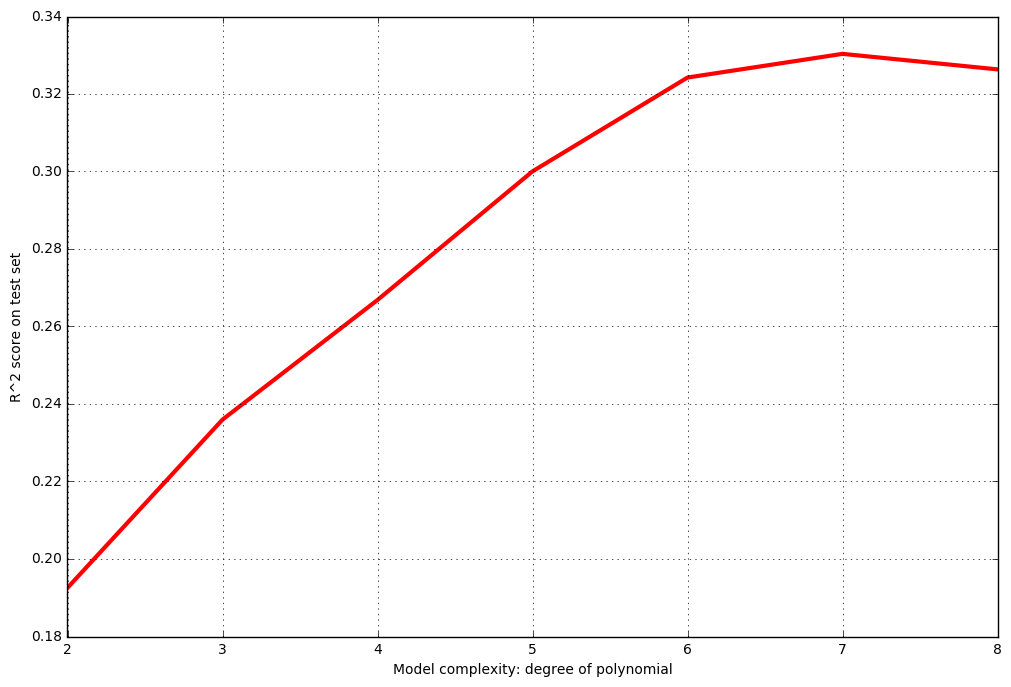

In [20]:
plt.figure(figsize=(12,8))
plt.grid(True)
plt.plot(poly_degree, linear_sample_score, lw=3, c='red')
plt.xlabel('Model complexity: degree of polynomial')
plt.ylabel('R^2 score on test set')

# Neural Network for regression

In [21]:
import tensorflow as tf

from keras import backend as K

#Clear TF memory
cfg = K.tf.ConfigProto()
cfg.gpu_options.allow_growth = True
K.set_session(K.tf.Session(config=cfg))

C:\Users\StrikeWade\Anaconda3\lib\site-packages\h5py\__init__.py:36: FutureWarning: Conversion of the second argument of issubdtype from `float` to `np.floating` is deprecated. In future, it will be treated as `np.float64 == np.dtype(float).type`.
  from ._conv import register_converters as _register_converters
Using TensorFlow backend.


In [22]:
#Parameters
learning_rate = 0.000001
training_epochs = 100000

n_input = 1 #Number of features
n_output = 1 #Regression output is a number only

n_hidden_layer = 25 #Number of neurons in the hidden layer

weights = {
    'hidden_layer': tf.Variable(tf.random_normal(shape=[n_input, n_hidden_layer])),
    'out': tf.Variable(tf.random_normal(shape=[n_hidden_layer, n_output]))
}

biases = {
    'hidden_layer': tf.Variable(tf.random_normal(shape=[n_hidden_layer])),
    'out': tf.Variable(tf.random_normal(shape=[n_output]))
}


print("Shape of the weights tensor of hidden layer:",weights['hidden_layer'].shape)
print("Shape of the weights tensor of output layer:",weights['out'].shape)
print("--------------------------------------------------------")
print("Shape of the bias tensor of hidden layer:",biases['hidden_layer'].shape)
print("Shape of the bias tensor of output layer:",biases['out'].shape)

Shape of the weights tensor of hidden layer: (1, 25)
Shape of the weights tensor of output layer: (25, 1)
--------------------------------------------------------
Shape of the bias tensor of hidden layer: (25,)
Shape of the bias tensor of output layer: (1,)


In [23]:
with tf.Session() as sess:
    sess.run(tf.global_variables_initializer())
    w = sess.run(weights['hidden_layer'])
    b = sess.run(biases['hidden_layer'])
    
print("Weight tensor initialized randomly\n---------------------------------------\n",w, w.shape)
print("Bias tensor initialized randomly\n---------------------------------------\n",b, b.shape)
sess.close()

Weight tensor initialized randomly
---------------------------------------
 [[ 1.7592596  -0.23555234 -0.7556784   1.6752948  -1.1868064  -0.564906
  -0.5103849   1.4068624   1.6321344   1.0043075   0.32272774  0.00331421
  -0.12490991  0.15986015  1.1230412   0.9609447  -1.521683   -0.66257524
   0.93400955  0.07251673  0.9359868  -0.20092845  1.405474   -0.7918794
  -0.6853283 ]] (1, 25)
Bias tensor initialized randomly
---------------------------------------
 [-0.53707576  0.04161538 -0.34524554 -1.024007    0.5200622   1.3184626
  0.45917833  0.93498534 -1.3518866   0.63090044  0.19141147 -0.81509095
  0.20104808 -0.21904902  0.17942818  0.04544522  0.1943938   1.6247748
  1.1976473   0.24477378 -0.8967624  -0.09864429  1.6787773   1.1029013
  0.20662145] (25,)


In [24]:
#Placeholder
x = tf.placeholder(dtype=tf.float32, shape=[None, n_input])
y = tf.placeholder(dtype=tf.float32, shape=[None, n_output])

In [25]:
#Hidden and output layers definition
#Hidden layer with relu activation
layer_1 = tf.add(tf.matmul(x, weights['hidden_layer']), biases['hidden_layer'])
layer_1 = tf.nn.relu(layer_1)

#Output layer with linear activation
ops = tf.add(tf.matmul(layer_1, weights['out']), biases['out'])

### Gradient descent optimizer for training (backpropagation):
For the training of the neural network we need to perform __backpropagation__ i.e. propagate the errors, calculated by this cost function, backwards through the layers all the way up to the input weights and bias in order to adjust them accordingly (minimize the error). This involves taking first-order derivatives of the activation functions and applying chain-rule to ___'multiply'___ the effect of various layers as the error propagates back.

You can read more on this here: [Backpropagation in Neural Network](https://en.wikipedia.org/wiki/Backpropagation)

Fortunately, TensorFlow already implicitly implements this step i.e. **takes care of all the chained differentiations for us**. All we need to do is to specify an Optimizer object and pass on the cost function. Here, we are using a **Gradient Descent Optimizer**.

Gradient descent is a first-order iterative optimization algorithm for finding the minimum of a function. To find a local minimum of a function using gradient descent, one takes steps proportional to the negative of the gradient (or of the approximate gradient) of the function at the current point.

You can read more on this: [Gradient Descent](https://en.wikipedia.org/wiki/Gradient_descent)

In [26]:
#Define loss and optimizer
loss = tf.reduce_mean(tf.squared_difference(ops, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

## TensorFlow Session for training and loss estimation

In [27]:
from tqdm import tqdm
import time

init = tf.global_variables_initializer()

epoch = 0
log_epoch = []
epoch_count = []
accuracy = []
loss_epoch = []

start = time.time()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in tqdm(range(training_epochs)):
        _, l = sess.run([optimizer, loss], feed_dict={x: X_train, y: y_train})
        loss_epoch.append(l)
        epoch_count.append(epoch+1)
        
    w = sess.run(weights)
    b = sess.run(biases)
    yhat = sess.run(ops, feed_dict={x: X_test})
    
end = time.time()
time_SNN = end - start

100%|██████████| 100000/100000 [04:25<00:00, 376.07it/s]


## Plot loss function as training epochs progress

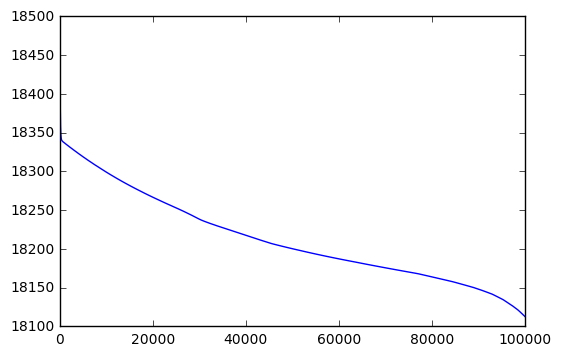

In [28]:
plt.plot(loss_epoch)

## Calculate and print root-mean-squared error and R^2 value for the fit

In [31]:
#Total variance
total_variance = np.sum(np.square(y_test - np.mean(y_test)))

#Residual sum of squares
residual = np.sum(np.square(yhat - y_test))

#Root mean square error
rmse = np.sqrt(np.sum(np.square(yhat - y_test)))

#R^2 coefficient
r2_SNN = 1 - (residual/total_variance)

print("RMSE error of the shallow neural network:",rmse)
print("R^2 value of the shallow neural network:",r2_coef)

RMSE error of the shallow neural network: 671.6677800185988
R^2 value of the shallow neural network: 0.07714916542720096


## Plot residuals plots

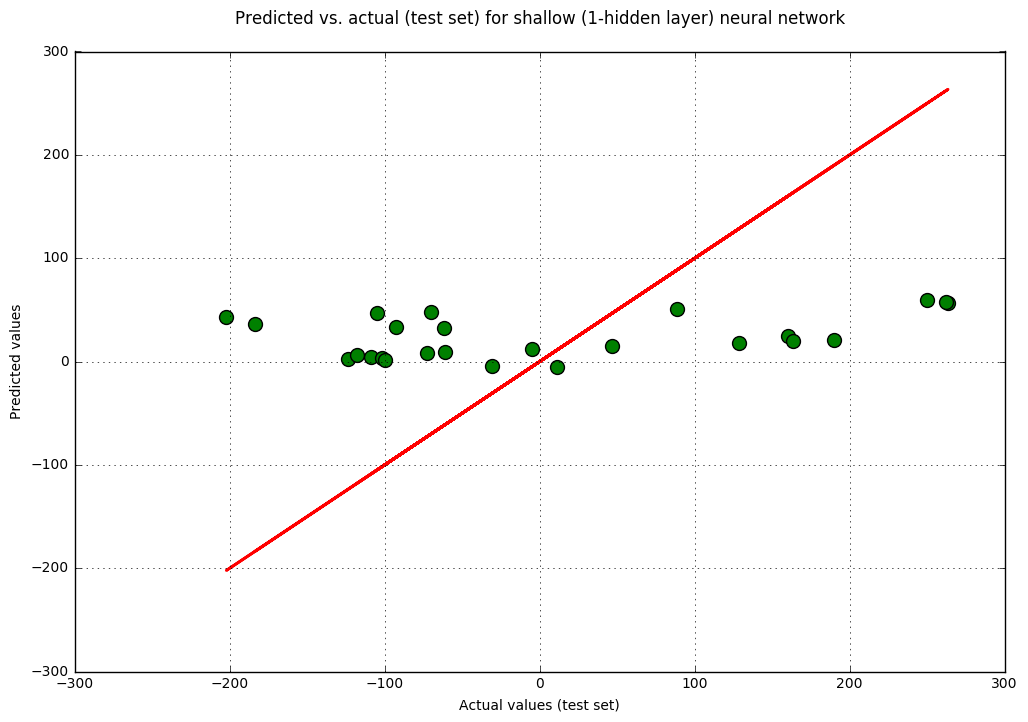

In [32]:
plt.figure(figsize=(12,8))
plt.title('Predicted vs. actual (test set) for shallow (1-hidden layer) neural network\n')
plt.xlabel('Actual values (test set)')
plt.ylabel('Predicted values')
plt.scatter(x=y_test, y=yhat, c='green', edgecolors='k', s=100)
plt.grid(True)
plt.plot(y_test, y_test, 'r', lw=2)

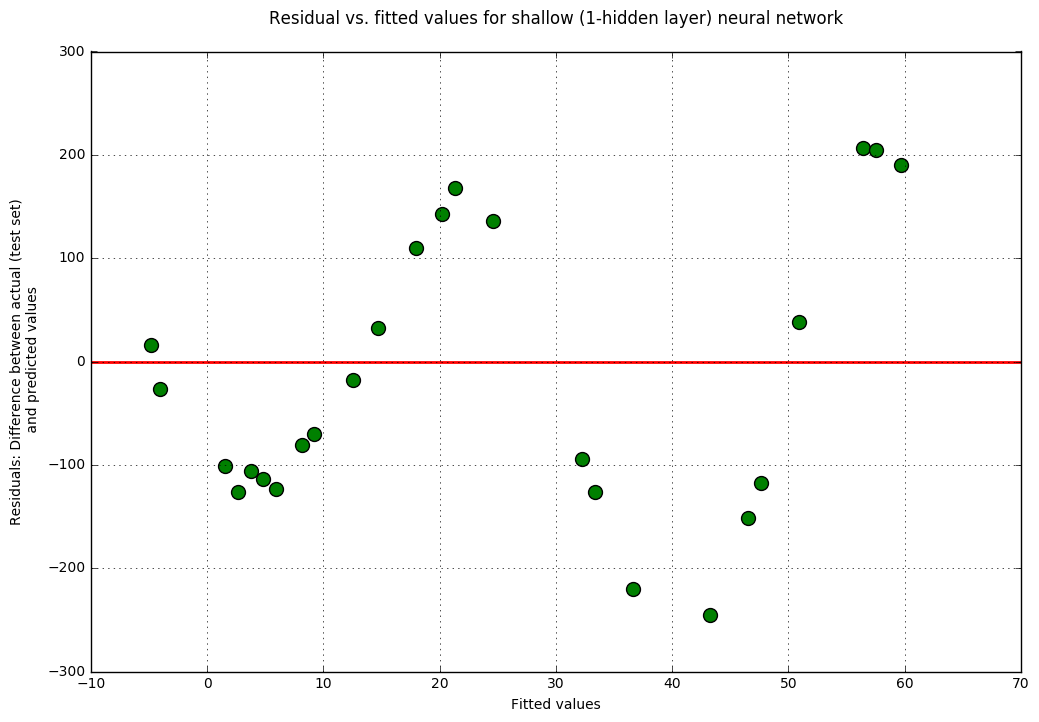

In [36]:
plt.figure(figsize=(12,8))
plt.title('Residual vs. fitted values for shallow (1-hidden layer) neural network\n')
plt.xlabel('Fitted values')
plt.ylabel('Residuals: Difference between actual (test set)\n and predicted values')
plt.scatter(x=yhat, y=y_test-yhat, c='green', edgecolors='k', s=100)
plt.grid(True)
plt.axhline(y=0,lw=2,c='red')

# More hidden layers

In [39]:
learning_rate = 0.00001
epochs = 35000

n_input = 1 #Number of features
n_output = 1 #Regression output ios a number only

n_hidden_layer_1 = 25
n_hidden_layer_2 = 25

weights = {
    'hidden_layer_1': tf.Variable(tf.random_normal(shape=[n_input, n_hidden_layer_1])),
    'hidden_layer_2': tf.Variable(tf.random_normal(shape=[n_hidden_layer_1, n_hidden_layer_2])),
    'out': tf.Variable(tf.random_normal(shape=[n_hidden_layer_2, n_output]))
}

biases = {
    'hidden_layer_1': tf.Variable(tf.random_normal(shape=[n_hidden_layer_1])),
    'hidden_layer_2': tf.Variable(tf.random_normal(shape=[n_hidden_layer_2])),
    'out': tf.Variable(tf.random_normal(shape=[n_output]))
}

x = tf.placeholder(dtype=tf.float32, shape=[None, n_input])
y = tf.placeholder(dtype=tf.float32, shape=[None, n_output])

In [40]:
#Hidden layer with relu activation
layer_1 = tf.add(tf.matmul(x, weights['hidden_layer_1']), biases['hidden_layer_1'])
layer_1 = tf.nn.relu(layer_1)

layer_2 = tf.add(tf.matmul(layer_1, weights['hidden_layer_2']), biases['hidden_layer_2'])
layer_2 = tf.nn.relu(layer_2)

#Output layer with linear activation
ops = tf.add(tf.matmul(layer_2, weights['out']), biases['out'])

In [41]:
loss = tf.reduce_mean(tf.squared_difference(ops, y))
optimizer = tf.train.GradientDescentOptimizer(learning_rate=learning_rate).minimize(loss)

In [42]:
init = tf.global_variables_initializer()

epoch = 0
log_epoch = []
epoch_count = []
accuracy = []
loss_epoch = []

start = time.time()

with tf.Session() as sess:
    sess.run(init)
    
    for epoch in tqdm(range(epochs)):
        _, l = sess.run([optimizer, loss], feed_dict={x: X_train, y: y_train})
        loss_epoch.append(l)
        epoch_count.append(epoch+1)
        
    w = sess.run(weights)
    b = sess.run(biases)
    yhat = sess.run(ops, feed_dict={x: X_test})
    
end = time.time()
time_DNN = end - start

100%|██████████| 35000/35000 [01:19<00:00, 438.26it/s]


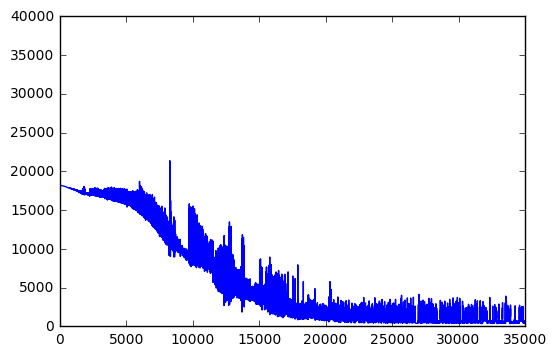

In [43]:
plt.plot(loss_epoch)

In [44]:
#Total variance
total_variance = np.sum(np.square(y_test - np.mean(y_test)))

#Residual sum of squares
residual = np.sum(np.square(yhat - y_test))

#Root mean square error
rmse = np.sqrt(np.sum(np.square(yhat - y_test)))

#R^2 coefficient
r2_DNN = 1 - (residual/total_variance)

print("RMSE error of the shallow neural network:",rmse)
print("R^2 value of the shallow neural network:",r2_coef)

RMSE error of the shallow neural network: 134.35066320350703
R^2 value of the shallow neural network: 0.963076564112265


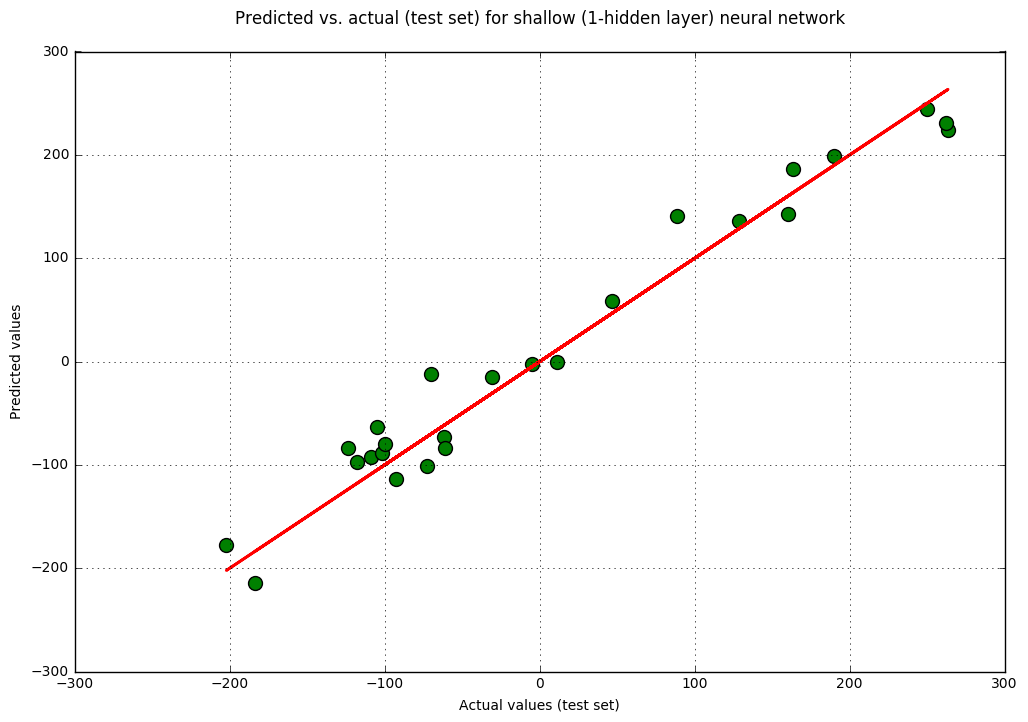

In [45]:
plt.figure(figsize=(12,8))
plt.title('Predicted vs. actual (test set) for shallow (1-hidden layer) neural network\n')
plt.xlabel('Actual values (test set)')
plt.ylabel('Predicted values')
plt.scatter(x=y_test, y=yhat, c='green', edgecolors='k', s=100)
plt.grid(True)
plt.plot(y_test, y_test, 'r', lw=2)

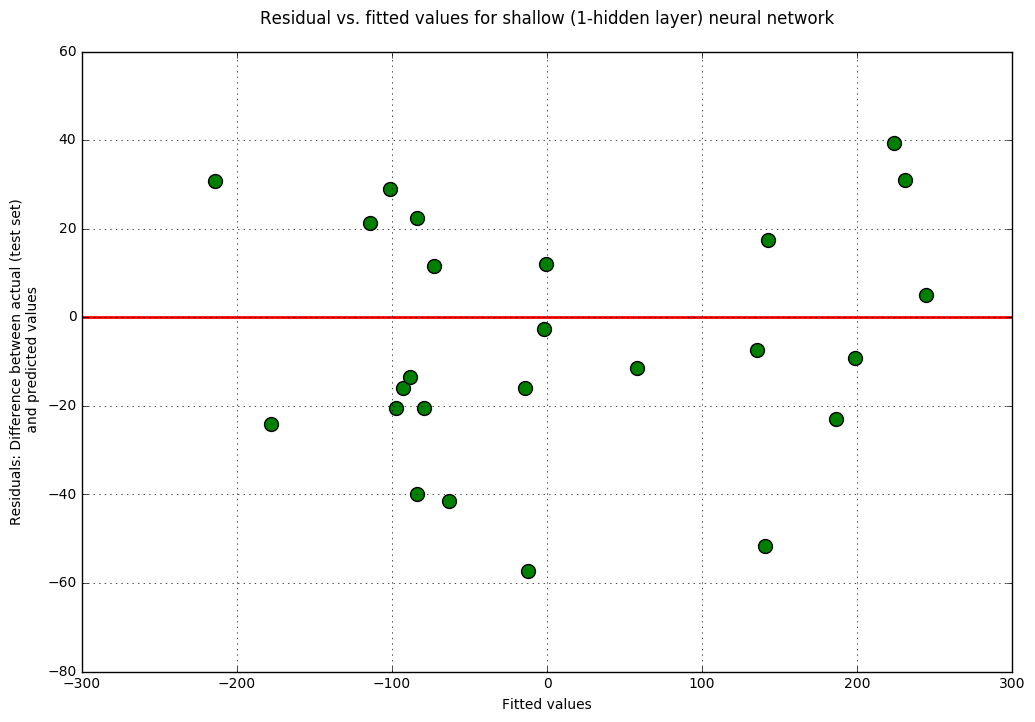

In [46]:
plt.figure(figsize=(12,8))
plt.title('Residual vs. fitted values for shallow (1-hidden layer) neural network\n')
plt.xlabel('Fitted values')
plt.ylabel('Residuals: Difference between actual (test set)\n and predicted values')
plt.scatter(x=yhat, y=y_test-yhat, c='green', edgecolors='k', s=100)
plt.grid(True)
plt.axhline(y=0,lw=2,c='red')

## Plot the time taken for model build/fit and the $R^2$-fit values achieved by each model

<Container object of 3 artists>

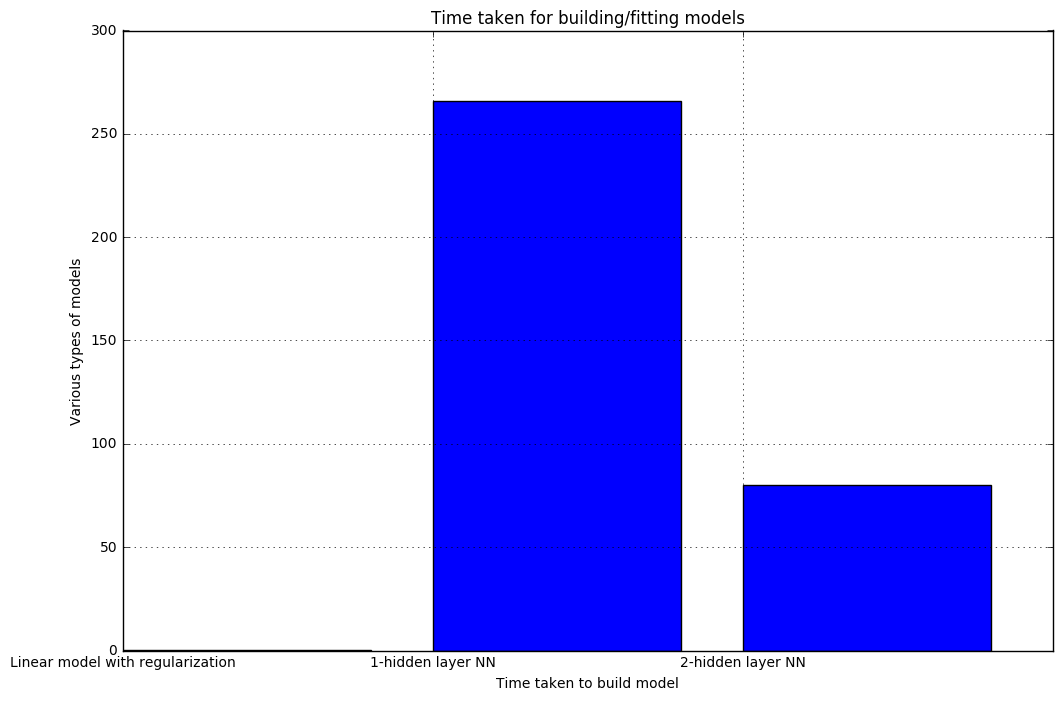

In [47]:
plt.figure(figsize=(12,8))
plt.title('Time taken for building/fitting models')
plt.xlabel('Time taken to build model')
plt.ylabel('Various types of models')
plt.grid(True)
plt.bar(left=[1,2,3], height=[time_linear, time_SNN, time_DNN], tick_label=['Linear model with regularization','1-hidden layer NN','2-hidden layer NN'])

<Container object of 3 artists>

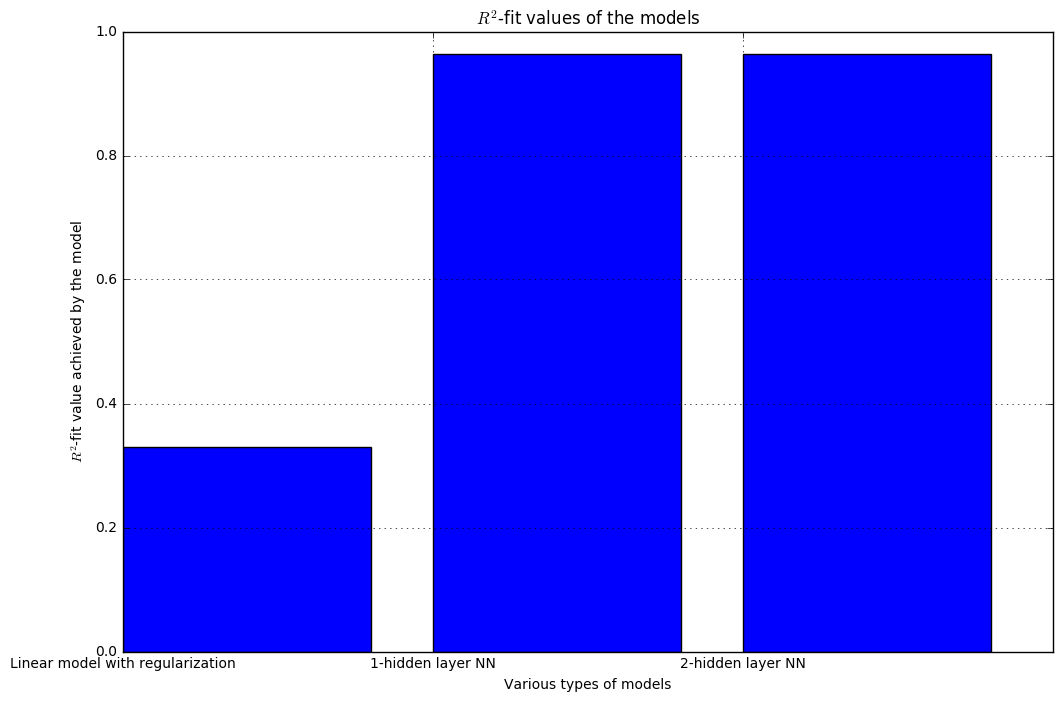

In [48]:
plt.figure(figsize=(12,8))
plt.title('$R^2$-fit values of the models')
plt.xlabel('Various types of models')
plt.ylabel('$R^2$-fit value achieved by the model')
plt.grid(True)
plt.bar(left=[1,2,3], height=[max(linear_sample_score), r2_SNN, r2_DNN], tick_label=['Linear model with regularization','1-hidden layer NN','2-hidden layer NN'])